<a href="https://colab.research.google.com/github/asokraju/ml-grinding/blob/master/hands_on_ml/Ch_11_intro_to_TF_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras.layers import Dense, Flatten, Input, Concatenate

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
print(tf.__version__)

2.3.0


#data

In [ ]:
fashin_minst = datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashin_minst.load_data()

In [ ]:
print('shape of X_train_full: ', X_train_full.shape," data format: ", X_train_full.dtype)
print('shape of y_train_full: ', y_train_full.shape," data format: ", y_train_full.dtype)
print('shape of X_test: ', X_test.shape," data format: ", X_test.dtype)
print('shape of y_test: ', y_test.shape," data format: ", X_test.dtype)

shape of X_train_full:  (60000, 28, 28)  data format:  uint8
shape of y_train_full:  (60000,)  data format:  uint8
shape of X_test:  (10000, 28, 28)  data format:  uint8
shape of y_test:  (10000,)  data format:  uint8


# normalizing the data

In [ ]:
np.max(X_train_full), np.min(X_train_full)

(255, 0)

In [ ]:
X_train, y_train = X_train_full[5000:]/255.0, y_train_full[5000:]
X_valid, y_valid = X_train_full[:5000]/255.0, y_train_full[:5000]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#Models

## Sequential API

In [ ]:
model = keras.models.Sequential()
model.add(Flatten(input_shape = [28, 28])) #X.reshape(-1,1)
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model = keras.models.Sequential([
                                 Flatten(input_shape = [28, 28]), #X.reshape(-1,1)
                                 Dense(300, activation='relu'),
                                 Dense(100, activation='relu'),
                                 Dense(10, activation='softmax')
    ])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_42 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
for layer in model.layers:
    print(layer.name)

flatten_3
dense_41
dense_42
dense_43


In [ ]:
#flatten ;ayer does not have biases.
for layer in model.layers[1:]:
    weights, biases = layer.get_weights()
    print('weights: ', weights)
    print('biases: ', biases)

weights:  [[-0.0411311  -0.02337134  0.05097158 ... -0.04708308  0.03772912
  -0.01452094]
 [-0.06844465  0.04945739  0.05753623 ...  0.01112539 -0.0479812
   0.06632842]
 [-0.05265922  0.00925277 -0.04399242 ... -0.04074002 -0.07318398
   0.03206403]
 ...
 [-0.0087887   0.06991172  0.05636422 ... -0.0735826  -0.05653531
   0.01719761]
 [-0.01943783 -0.06788585 -0.07130998 ...  0.02889024 -0.00117259
  -0.01744663]
 [-0.05360591 -0.04281914  0.05690666 ... -0.02439856  0.02835048
   0.06800966]]
biases:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7156 - accuracy: 0.7620 - val_loss: 0.5089 - val_accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4921 - accuracy: 0.8276 - val_loss: 0.4854 - val_accuracy: 0.8224
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4442 - accuracy: 0.8436 - val_loss: 0.4262 - val_accuracy: 0.8536
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4171 - accuracy: 0.8529 - val_loss: 0.3933 - val_accuracy: 0.8672
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3965 - accuracy: 0.8606 - val_loss: 0.3880 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3794 - accuracy: 0.8668 - val_loss: 0.4045 - val_accuracy: 0.8496
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3657 - accuracy: 0.8693 - val_loss: 0.3696 - val_accuracy:

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
1547/1547 [==============================] - 4s 3ms/step - loss: 0.2207 - accuracy: 0.9208 - val_loss: 0.2248 - val_accuracy: 0.9165
Epoch 2/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.2181 - accuracy: 0.9226 - val_loss: 0.2301 - val_accuracy: 0.9155
Epoch 3/30
1547/1547 [==============================] - 4s 3ms/step - loss: 0.2142 - accuracy: 0.9227 - val_loss: 0.2267 - val_accuracy: 0.9147
Epoch 4/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.2097 - accuracy: 0.9239 - val_loss: 0.2405 - val_accuracy: 0.9115
Epoch 5/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.2071 - accuracy: 0.9260 - val_loss: 0.2384 - val_accuracy: 0.9105
Epoch 6/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.2038 - accuracy: 0.9276 - val_loss: 0.2410 - val_accuracy: 0.9107
Epoch 7/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.2013 - accuracy: 0.9279 - val_loss: 0.2446 - val_accuracy:

##History

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1522 - accuracy: 0.9463 - val_loss: 0.3031 - val_accuracy: 0.8960
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1474 - accuracy: 0.9483 - val_loss: 0.3174 - val_accuracy: 0.8902
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1444 - accuracy: 0.9485 - val_loss: 0.2997 - val_accuracy: 0.8998
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1429 - accuracy: 0.9505 - val_loss: 0.3197 - val_accuracy: 0.8916
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1391 - accuracy: 0.9510 - val_loss: 0.3100 - val_accuracy: 0.8952
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1376 - accuracy: 0.9500 - val_loss: 0.3206 - val_accuracy: 0.8904
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1346 - accuracy: 0.9519 - val_loss: 0.3108 - val_accuracy:

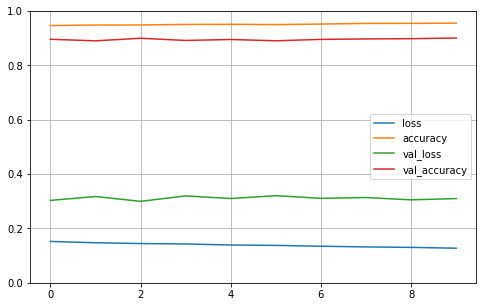

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model.evaluate(X_test/255.0, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3506 - accuracy: 0.8904


[0.3505941927433014, 0.8903999924659729]

In [ ]:
X_new = X_test[:3]/255.0
np.argmax(model.predict(X_new), axis=1)

array([9, 2, 1])

In [ ]:
model.predict(X_new).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

##REgression

In [ ]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.6270 - val_loss: 0.7106
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 4.2895 - val_loss: 0.5314
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6145 - val_loss: 0.4454
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3979 - val_loss: 0.4257
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3803 - val_loss: 0.4220
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3770 - val_loss: 0.4183
Epoch 7/20
363/363 [==============================] - 0s 996us/step - loss: 0.3775 - val_loss: 0.4169
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3651 - val_loss: 0.4060
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3590 - val_loss: 0.4064
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3555 - val_loss: 0.39

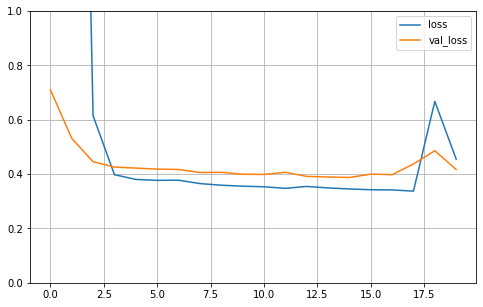

162/162 [==============================] - 0s 839us/step - loss: 0.4004


In [ ]:
model = keras.models.Sequential([
                                 Dense(30, activation='relu', input_shape = X_train.shape[1:]),
                                 Dense(1)
])
model.compile(loss="mean_squared_error", 
              optimizer='sgd'
              )
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

##Wide networks

In [ ]:
input_ = Input(shape = X_train.shape[1:])
hidden1 = Dense(30, activation='relu')(input_)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
concat = Concatenate()([input_, hidden3])
output = Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs=[output])

In [ ]:
model.summary()

Model: "functional_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_46 (Dense)                (None, 30)           270         input_8[0][0]                    
__________________________________________________________________________________________________
dense_47 (Dense)                (None, 20)           620         dense_46[0][0]                   
__________________________________________________________________________________________________
dense_48 (Dense)                (None, 10)           210         dense_47[0][0]                   
_______________________________________________________________________________________

In [ ]:
input_A = Input(shape = [5])
input_B = Input(shape = [6])
hidden1 = Dense(30, activation='relu')(input_B)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
concat = Concatenate()([input_A, hidden3])
output = Dense(1)(concat)
model_2 = keras.Model(inputs = [input_A, input_B], outputs=[output])

In [ ]:
model_2.summary()

Model: "functional_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_50 (Dense)                (None, 30)           210         input_10[0][0]                   
__________________________________________________________________________________________________
dense_51 (Dense)                (None, 20)           620         dense_50[0][0]                   
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 5)]          0                                            
_______________________________________________________________________________________

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
model_2.compile(loss="mean_squared_error", 
              optimizer='sgd'
              )
history = model_2.fit((X_train_A, X_train_B), y_train, epochs=500,validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model_2.evaluate((X_test_A, X_test_B), y_test)
y_pred = model_2.predict((X_new_A, X_new_B))

Epoch 1/500
363/363 [==============================] - 1s 1ms/step - loss: 0.2680 - val_loss: 0.3120
Epoch 2/500
363/363 [==============================] - 0s 1ms/step - loss: 0.2674 - val_loss: 0.3201
Epoch 3/500
363/363 [==============================] - 0s 1ms/step - loss: 0.2664 - val_loss: 0.3120
Epoch 4/500
363/363 [==============================] - 0s 1ms/step - loss: 0.2668 - val_loss: 0.3101
Epoch 5/500
363/363 [==============================] - 0s 1ms/step - loss: 0.2659 - val_loss: 0.3077
Epoch 6/500
363/363 [==============================] - 0s 1ms/step - loss: 0.2660 - val_loss: 0.3087
Epoch 7/500
363/363 [==============================] - 0s 1ms/step - loss: 0.2655 - val_loss: 0.3133
Epoch 8/500
363/363 [==============================] - 0s 1ms/step - loss: 0.2677 - val_loss: 0.3111
Epoch 9/500
363/363 [==============================] - 0s 1ms/step - loss: 0.2653 - val_loss: 0.3108
Epoch 10/500
363/363 [==============================] - 0s 1ms/step - loss: 0.2651 - val_lo

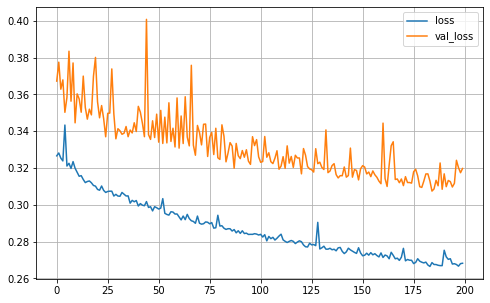

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)